<a href="https://colab.research.google.com/github/PeruVinayak/DSML_Projects/blob/main/LoanTap_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= purple> <font size = -0.25> <b> About LoanTap: </b> </font>

<font color=black>
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

1.   Personal Loan
2.   EMI Free Loan
3.   Personal Overdraft
4.   Advance Salary Loan

**Note:** This case study will focus on the underwriting process behind Personal Loan only.

# <font color= purple> <font size = -0.25>  <b> Business problem:</b> </font>

<font color=black>

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [240]:
# importing required/common libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
# converting data into dataframe

df = pd.read_csv("LoanTapData.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# <font color= purple> <font size = -0.25>  <b> Data Dictionary:</b> </font>

<font color=black>

1.   loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2.   term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3.   int_rate : Interest Rate on the loan
4.   installment : The monthly payment owed by the borrower if the loan originates.
5.   grade : LoanTap assigned loan grade
6.   sub_grade : LoanTap assigned loan subgrade
7.   emp_title :The job title supplied by the Borrower when applying for the loan.
8.   emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9.   home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10.   annual_inc : The self-reported annual income provided by the borrower during registration.
11.   verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12.   issue_d : The month which the loan was funded
13.   loan_status : Current status of the loan - Target Variable
14.   purpose : A category provided by the borrower for the loan request.
15.   title : The loan title provided by the borrower
16.   dti : A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower's self-reported monthly income.
17.   earliest_cr_line :The month the borrower's earliest reported credit line was opened
18.   open_acc : The number of open credit lines in the borrower's credit file.
19.   pub_rec : Number of derogatory public records
20.   revol_bal : Total credit revolving balance
21.   revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22.   total_acc : The total number of credit lines currently in the borrower's credit file
23.   initial_list_status : The initial listing status of the loan. Possible values are - W, F
24.   application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25.   mort_acc : Number of mortgage accounts.
26.   pub_rec_bankruptcies : Number of public record bankruptcies
27.   Address: Address of the individual

# <font color= purple> <font size = -0.25>  <b> **Observations on Data**</b> </font>

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [243]:
# No.of rows and columns in the dataset

df.shape

(396030, 27)

In [244]:
categorical_cols = df.select_dtypes('object').columns
numerical_cols = df.select_dtypes('float64').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Re-assigning the categorical variables as we have converted them

categorical_cols = df.select_dtypes('category').columns

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

In [246]:
print(numerical_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')


In [247]:
print(categorical_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [248]:
# Missing value detection of each columns

df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
loan_amnt,0
dti,0
application_type,0
initial_list_status,0


In [249]:
# Statistical summary on numerical variables

df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [250]:
# Statistical summary on categorical variables

df.describe(include='category').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

**Outliers:** The significant differences between mean & median in key attributes like loan amount and revolving balance indicate potential outliers.

**Loan Duration Preference:** A preference for 36-months loan terms among borrowers suggests a balance between manageable installments.

**Home Ownership Trends:** The prevalence of applicants with mortgaged homes suggests financial stability or a need for substantial, property-secured loans.

**Successful Loan Repayment:** Most loans being fully paid off reflects positively on borrowers' financial commitment, indicating effective lending criteria.

**Debt Consolidation Dominance:** The primary use of loans for debt consolidation highlights a common strategy to manage or reduce high-interest debt.

**Individual Borrowers:** The predominance of individual applicants suggests that personal loans are a major market segment.

# <font color= purple> <font size = -0.25>  <b> **Univariate Analysis** </b> </font>


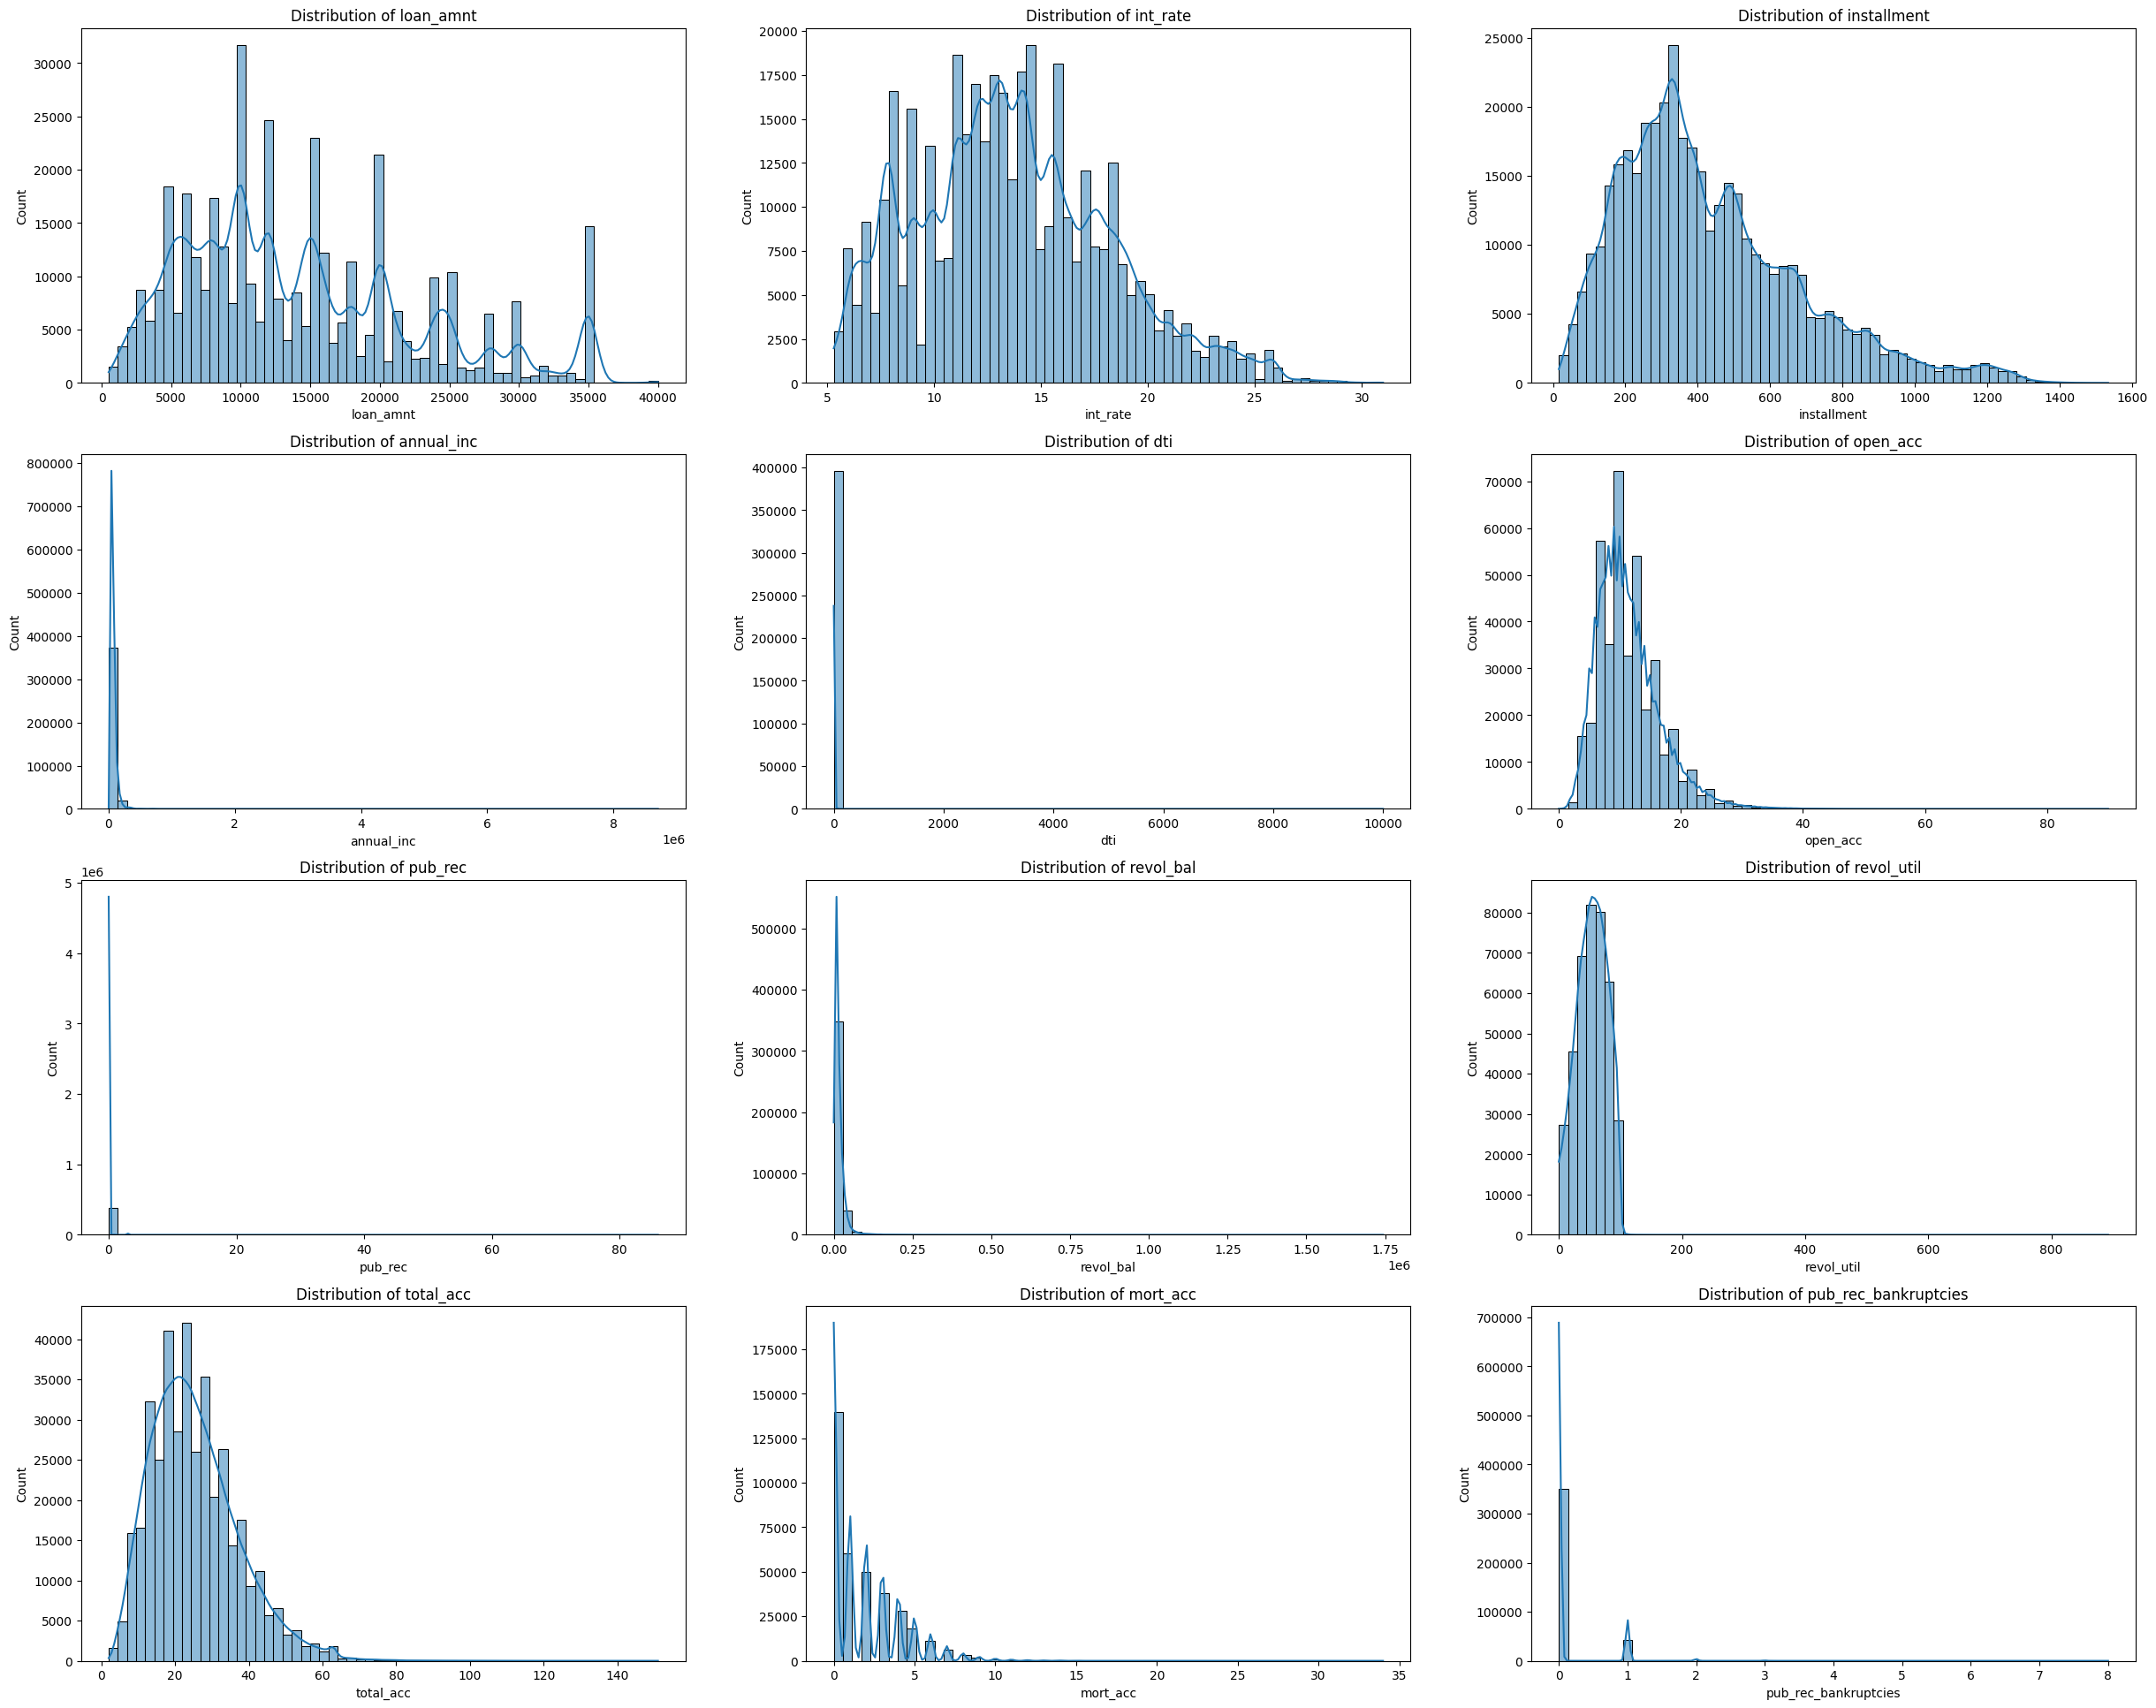

In [251]:
# Analyzing the distribution of numerical variables

fig = plt.figure(figsize = (30,24))

for pos,col in enumerate(numerical_cols):
    plt.subplot(4,3,pos+1)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col], kde=True, bins=60)
plt.show()

# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

*   The loan_amnt, int_rate, installment open_acc and total_acc are having right skewed distribution.

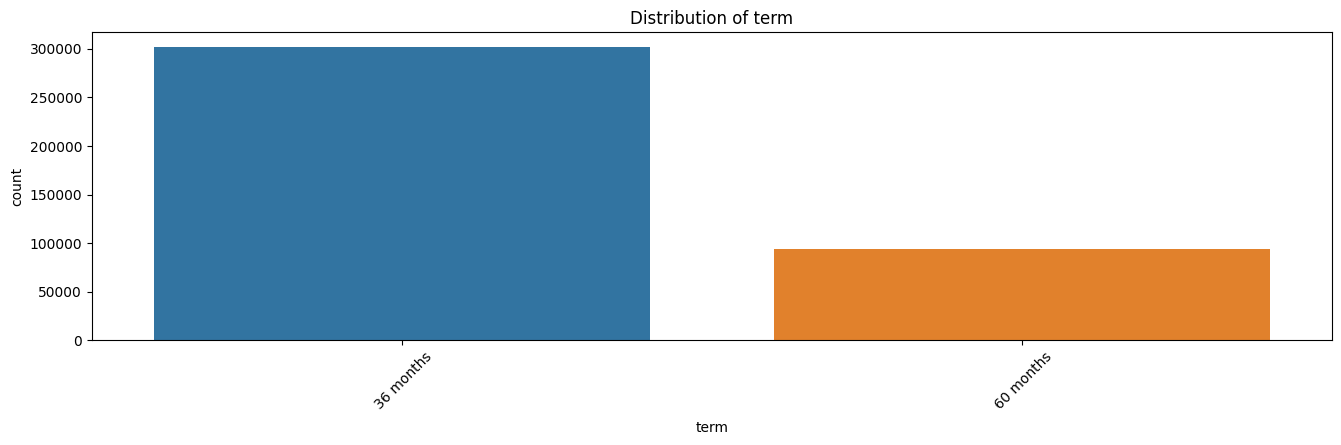

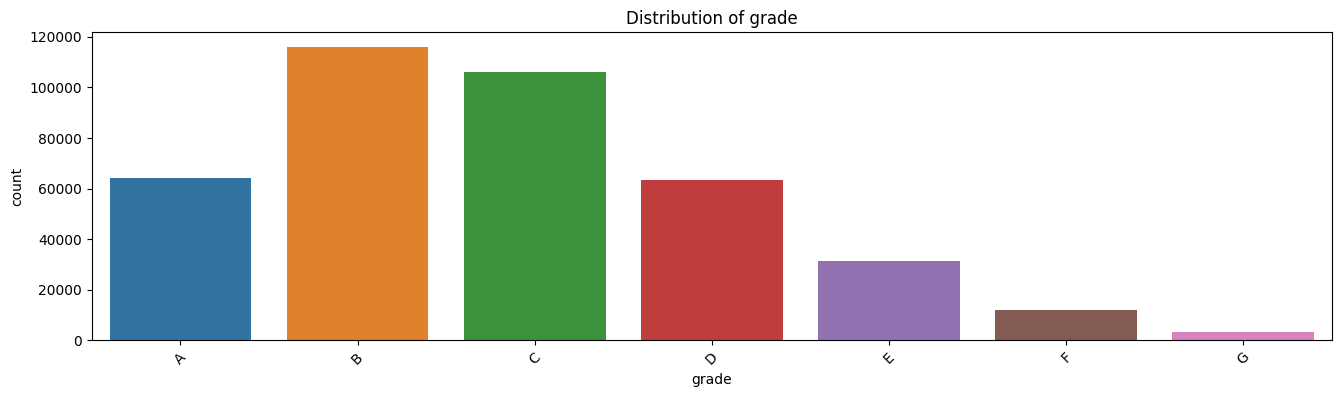

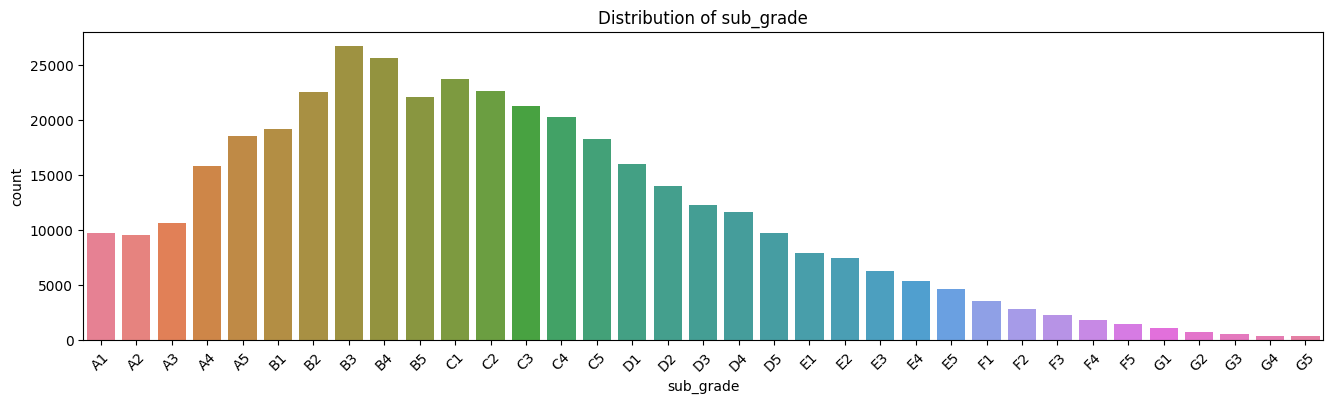

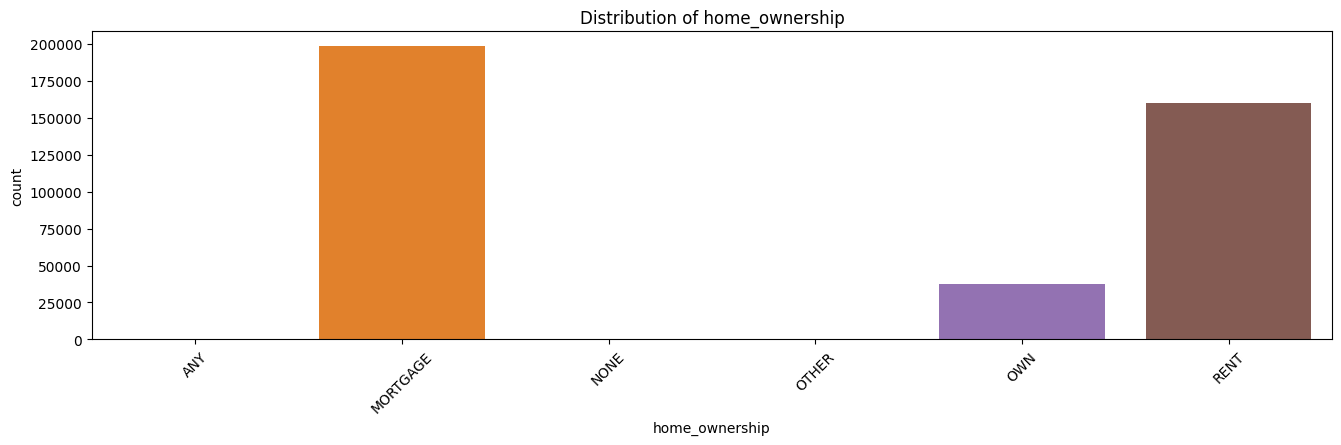

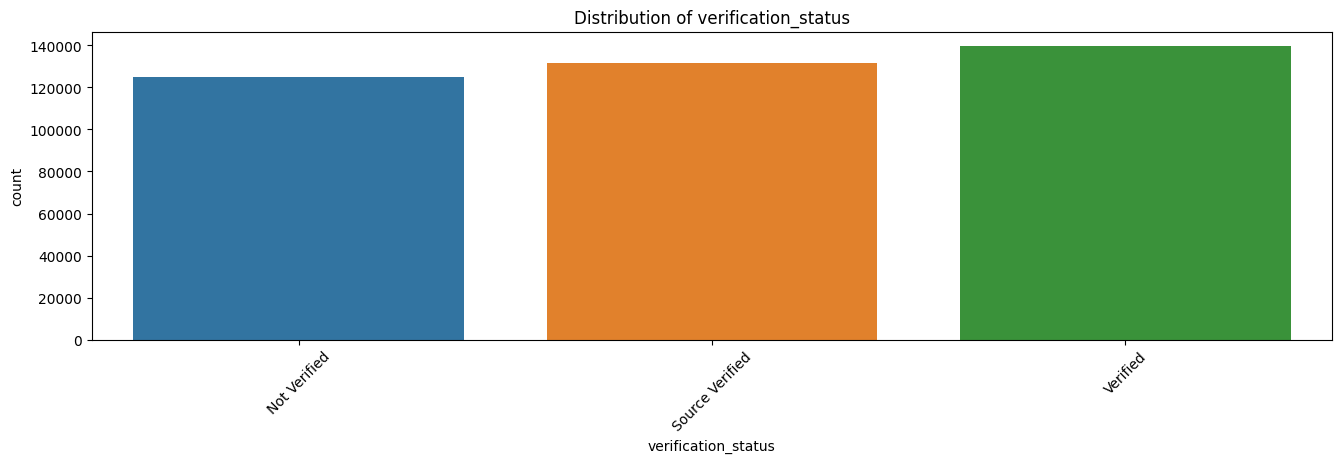

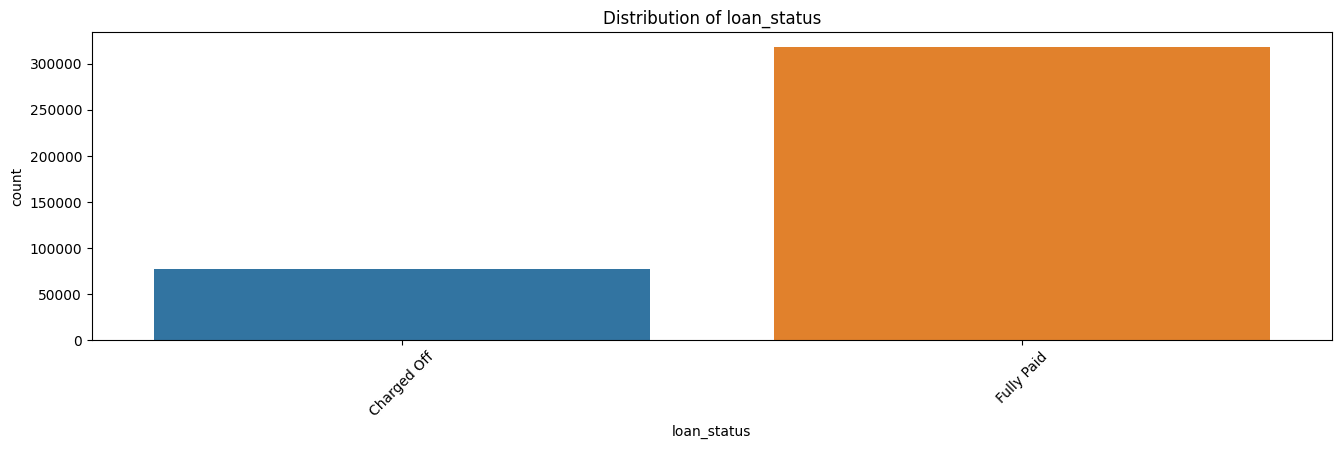

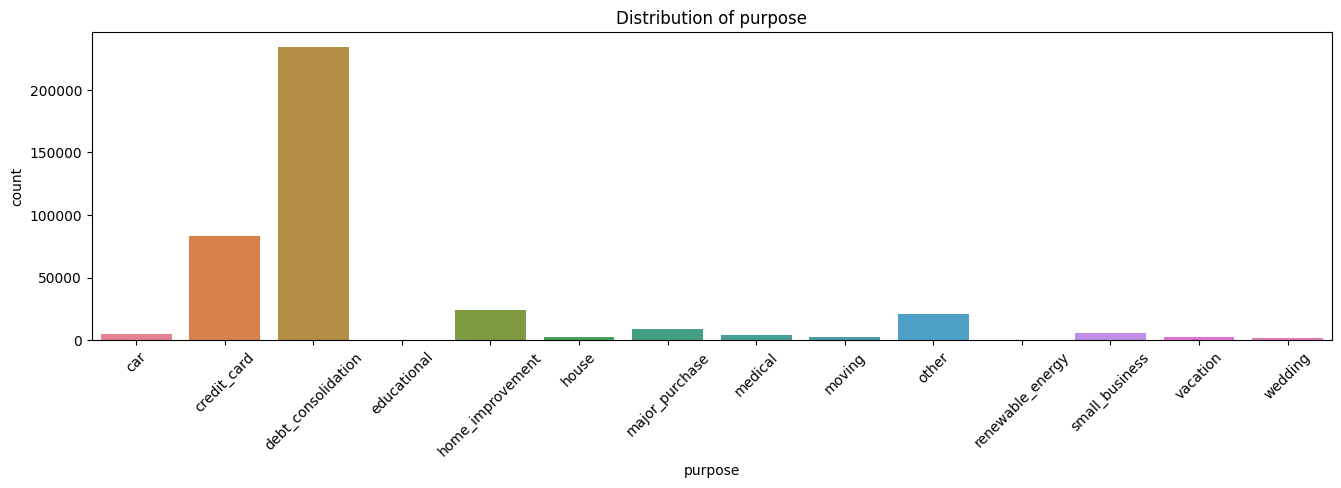

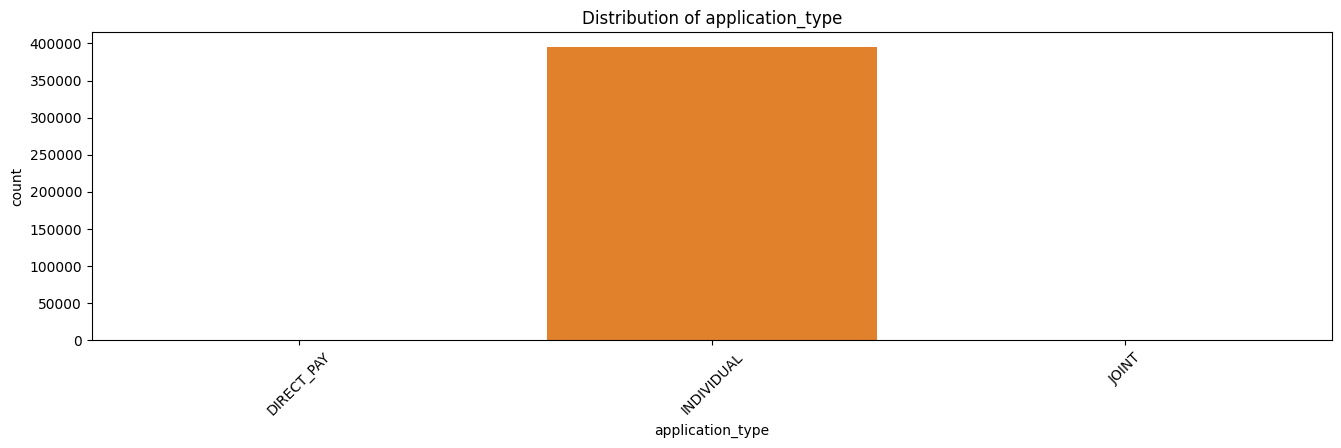

In [252]:
# Analyzing the distribution of categorical variables

c_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','application_type']

for pos,col in enumerate(c_cols):
    plt.figure(figsize=(16, 4))
    plt.title(f"Distribution of {col}")
    sns.countplot(data=df, x=col, hue=col)
    plt.xticks(rotation=45)

plt.show()

# <font color= purple> <font size = -0.25>  <b> **Bivariate Analysis** </b> </font>

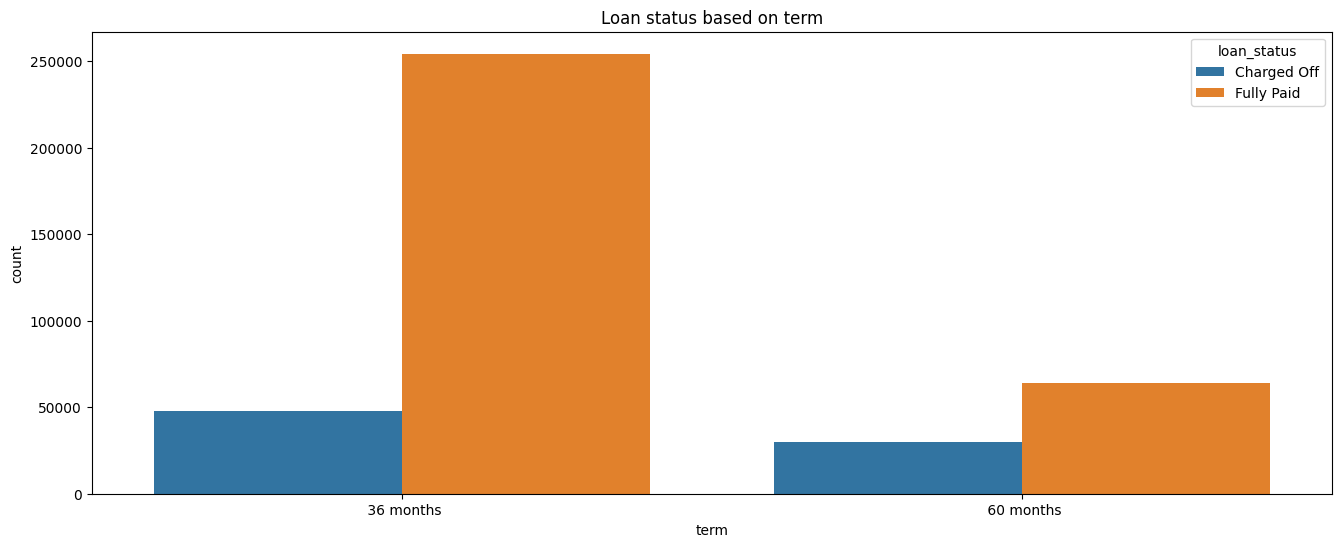

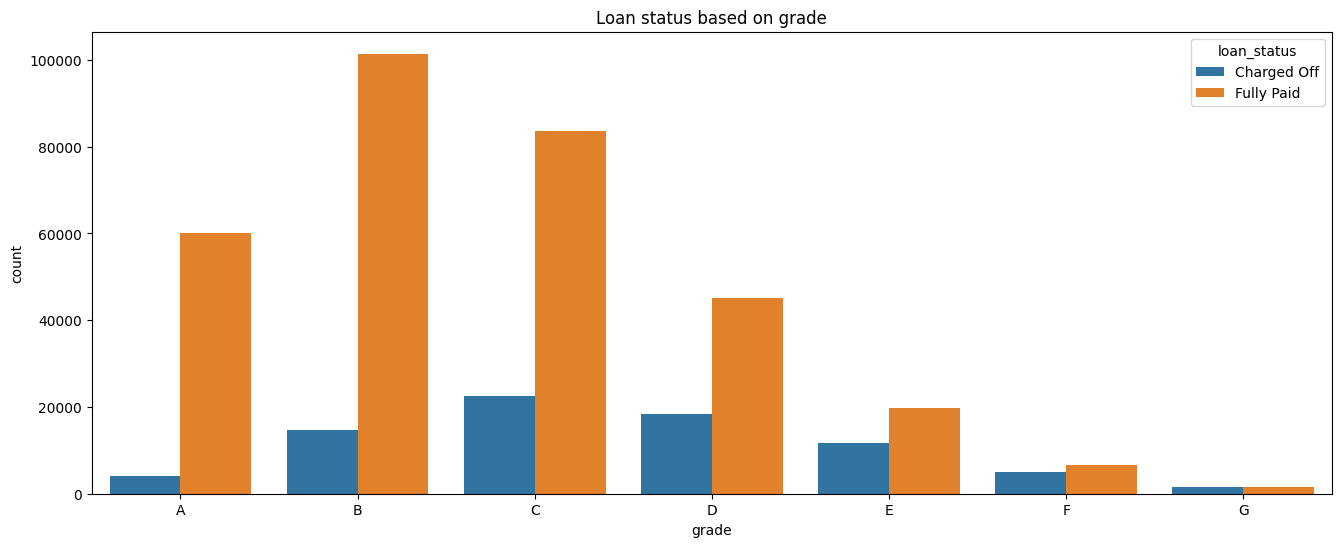

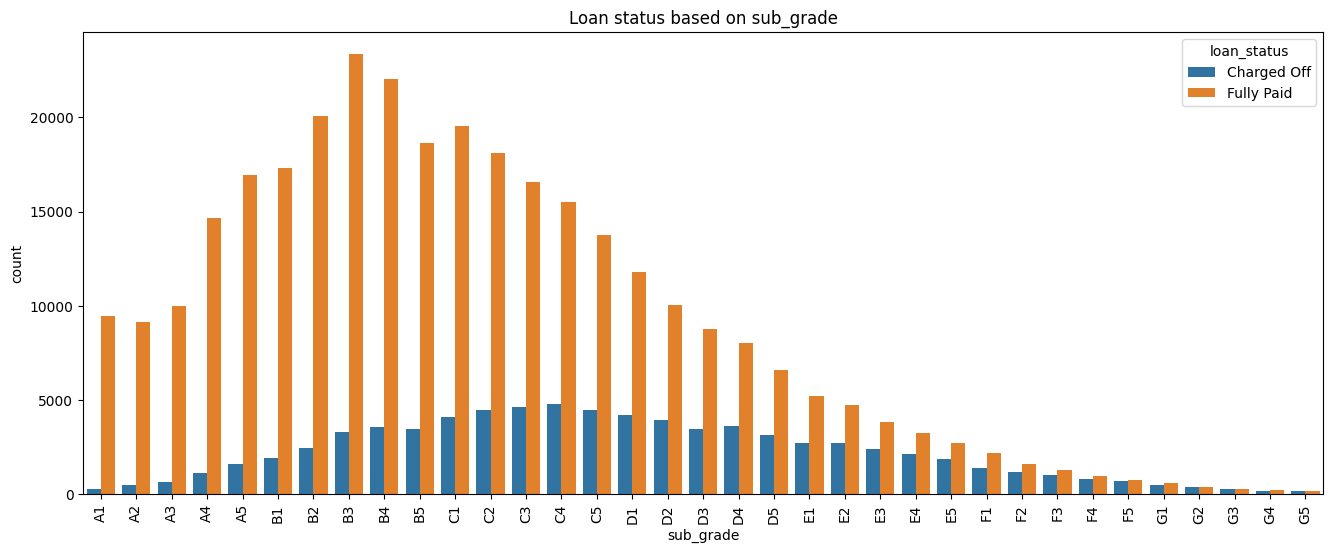

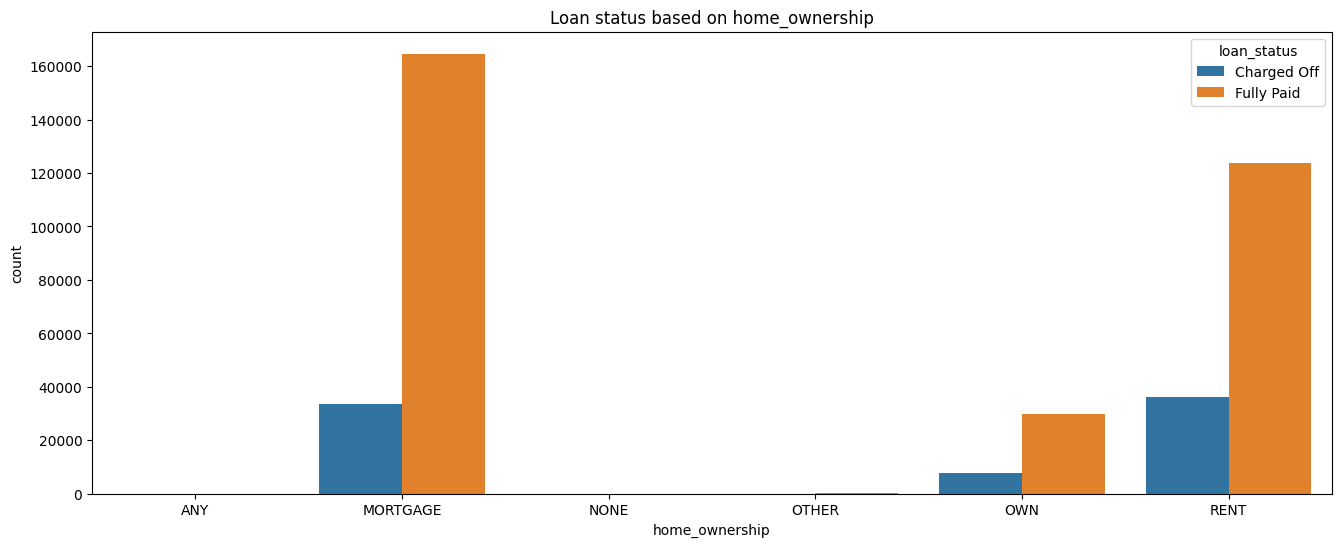

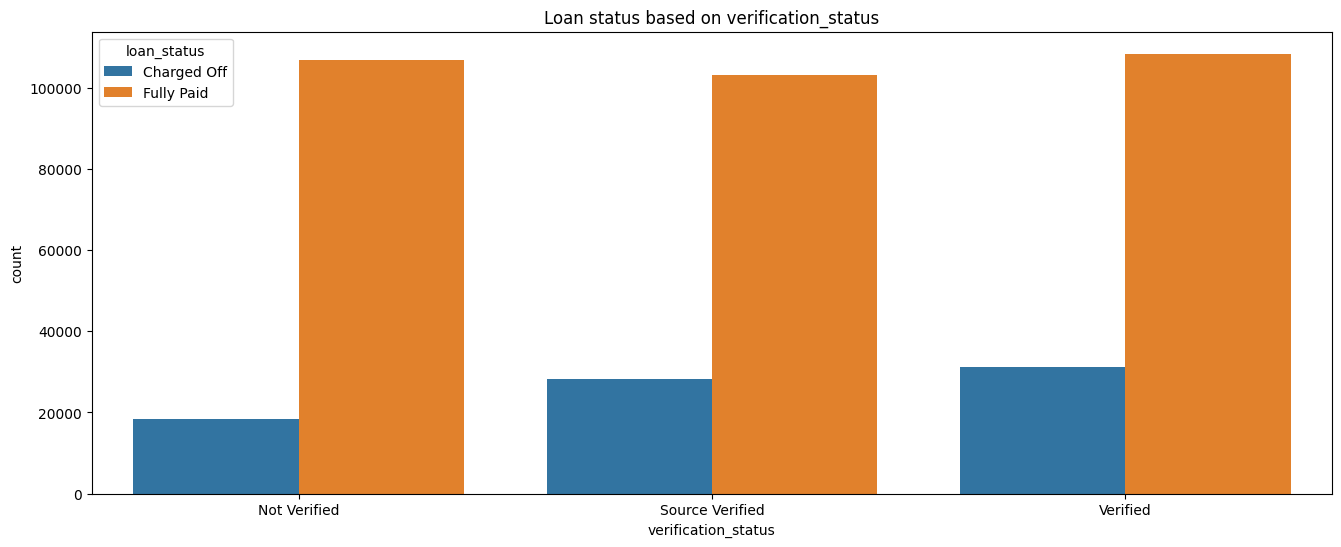

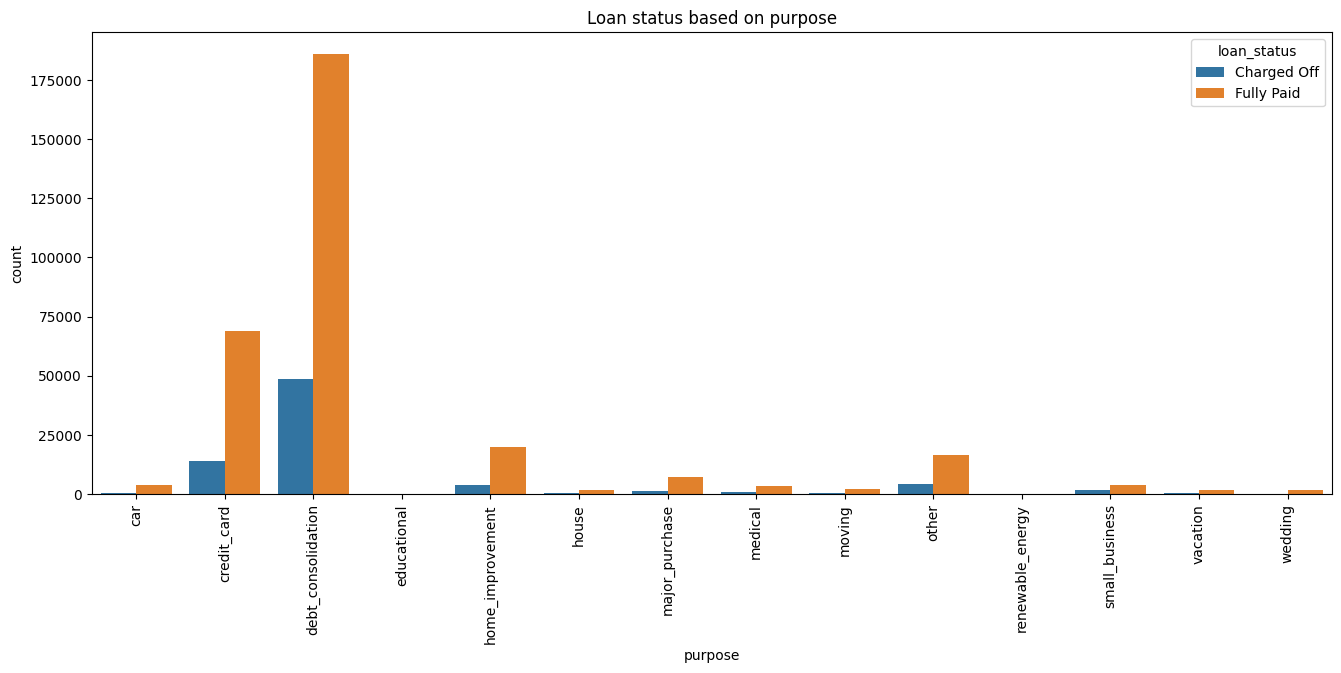

In [253]:
# Analyzing Loan status based on other categorical variables

c_cols_1 = ['term','grade','sub_grade','home_ownership','verification_status','purpose']

for pos,col in enumerate(c_cols_1):
    plt.figure(figsize=(16, 6))
    plt.title(f"Loan status based on {col}")
    sns.countplot(data=df, x=col, hue='loan_status')
    if col=='purpose' or col=='sub_grade':
        plt.xticks(rotation=90)
plt.show()

In [254]:
Top_5_emp_title = df.emp_title.value_counts()[:5].reset_index()
Top_5_emp_title = pd.DataFrame(Top_5_emp_title)
Top_5_emp_title

,emp_title,count
0,Teacher,4389
1,Manager,4250
2,Registered Nurse,1856
3,RN,1846
4,Supervisor,1830


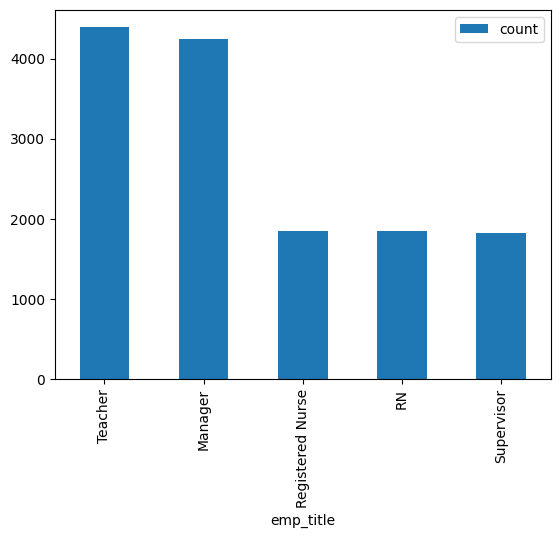

In [255]:
Top_5_emp_title.plot(x='emp_title',kind='bar')
plt.show()

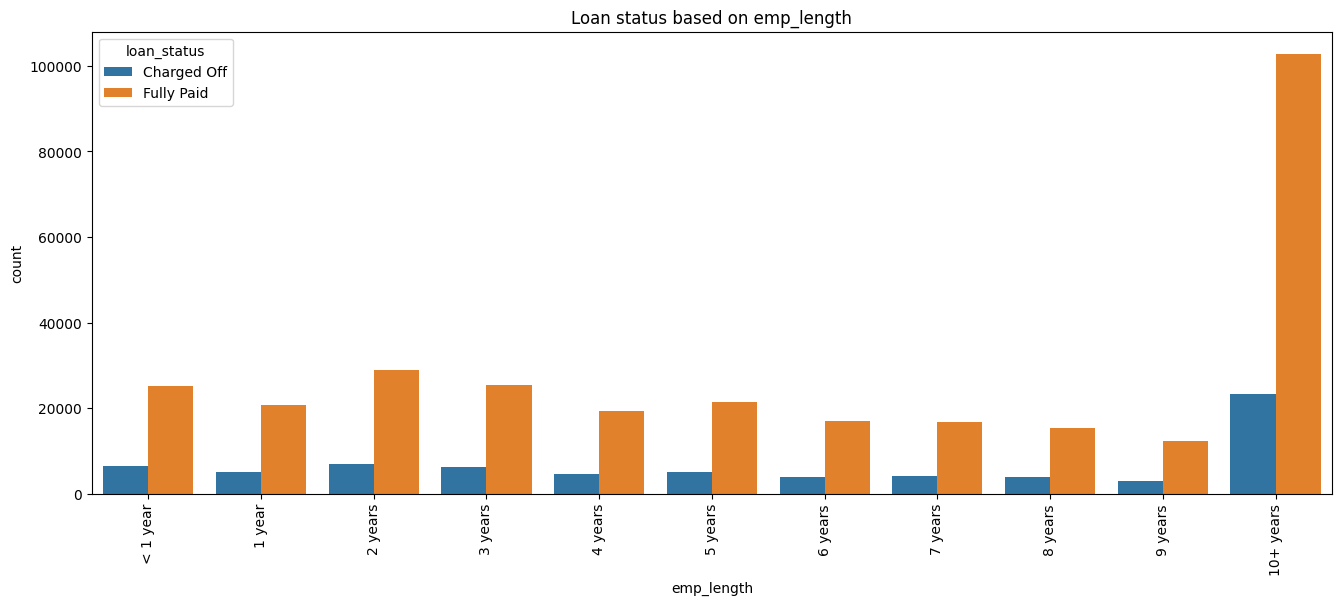

In [256]:
emp_lenght_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
plt.figure(figsize=(16, 6))
plt.title(f"Loan status based on emp_length")
sns.countplot(data=df,x='emp_length',hue='loan_status',order=emp_lenght_order)
plt.xticks(rotation=90)

plt.show()

# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

**Loan Terms:** The most popular loan term is 36 months, with a high completion rate.

**Loan Types:** Mortgages and rental loans are the most common loan types. Debt consolidation loans are also frequently used.

**Creditworthiness:** Borrowers of credit grades "B & C" with the subgrades of "B1 to C5" tend to have the highest repayment rates.

**Occupations:** Managers and teachers are the professions with the highest loan approval rates.

**Repayment:** Individuals employed for over 10 years demonstrate a strong track record of loan repayment.

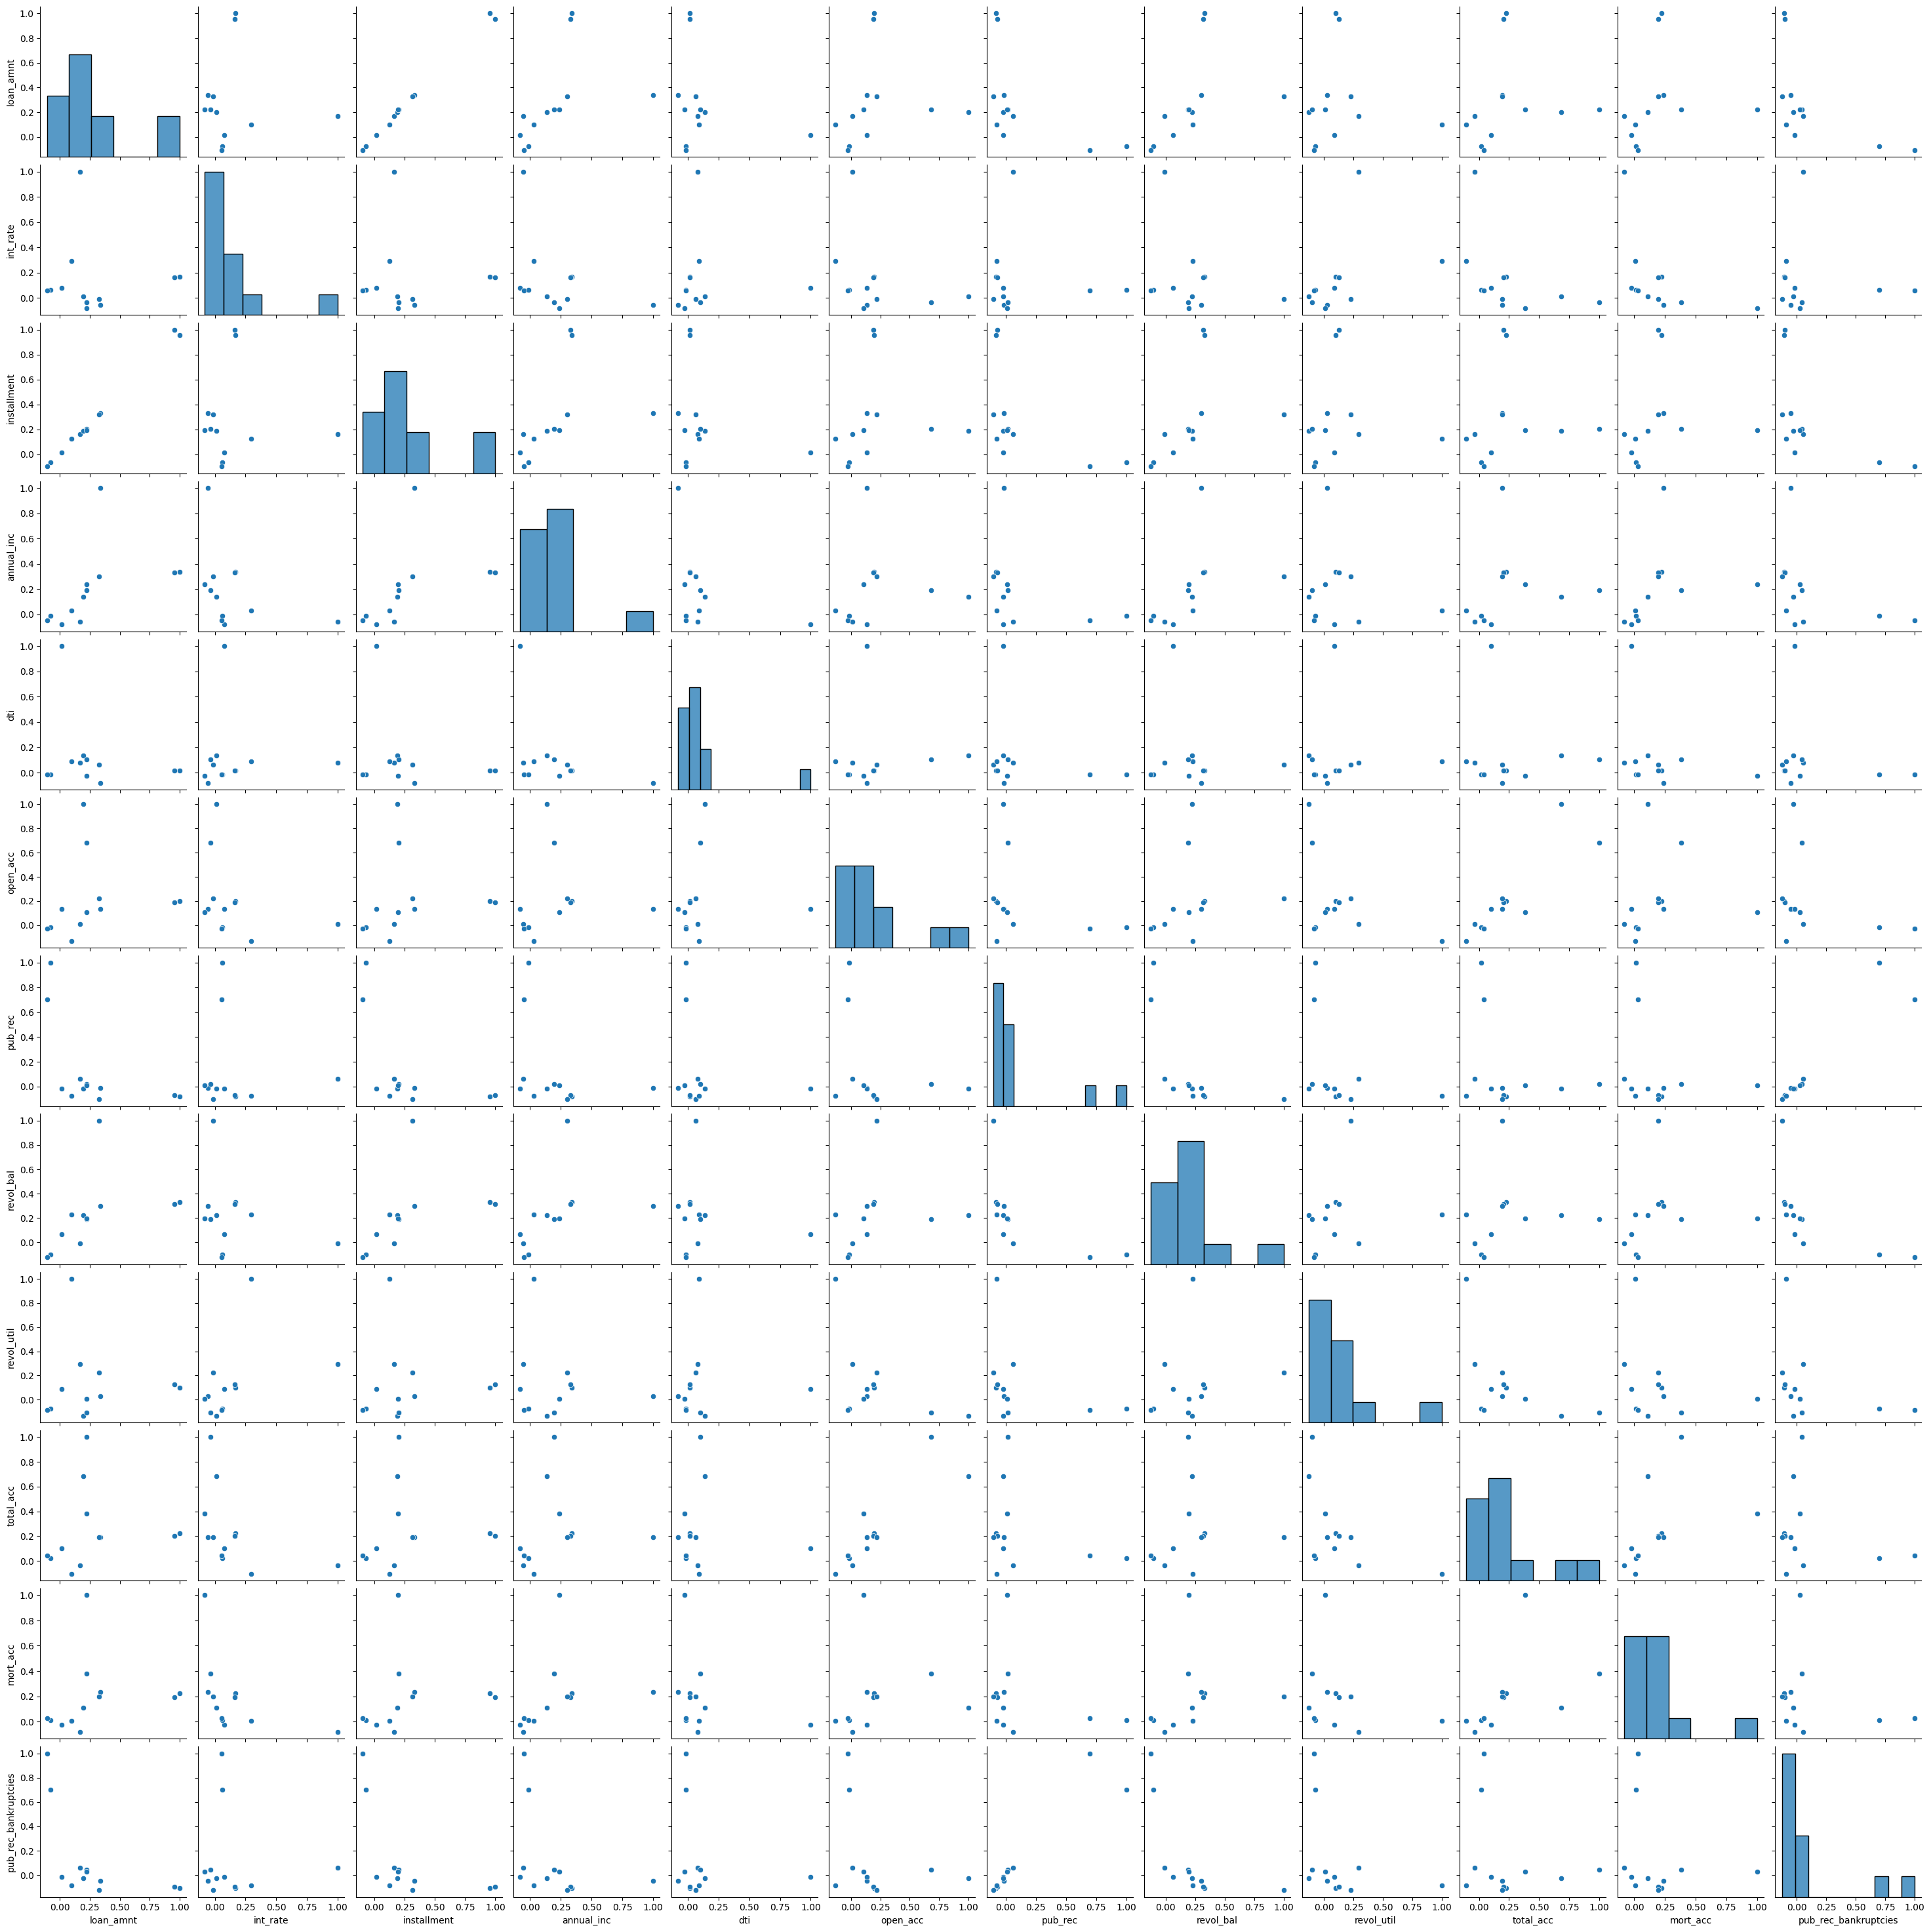

In [215]:
sns.pairplot(df.corr(numeric_only=True))

# <font color= purple> <font size = -0.25>  <b> **Correlation Analysis** </b> </font>

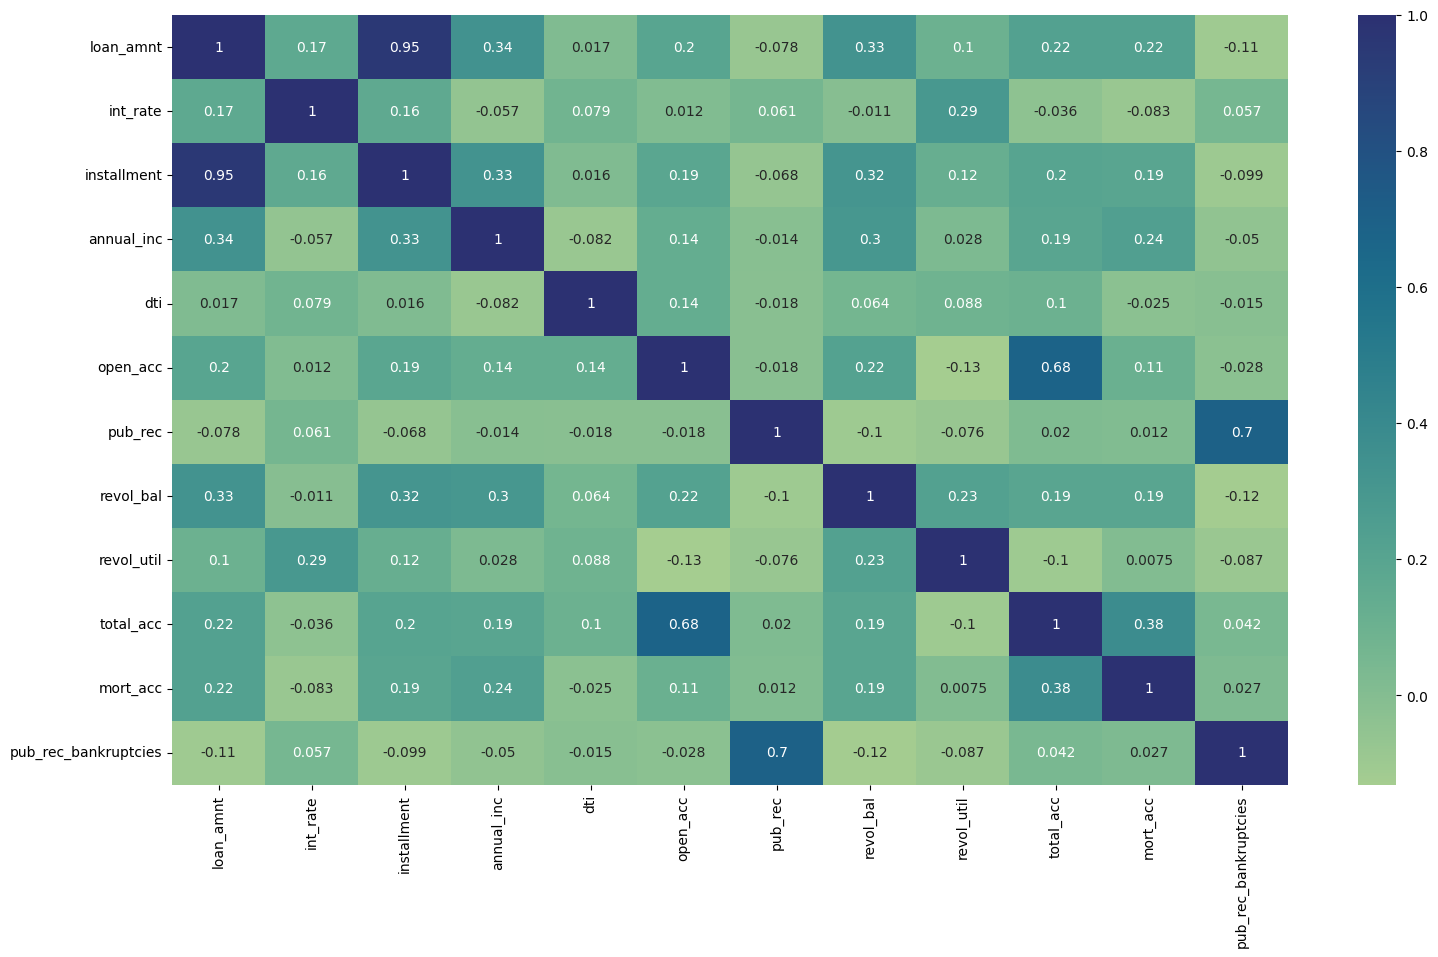

In [216]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'crest', annot = True)
plt.show()

# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

**Positive correlation:** Loan amount has the strong positive correlation with installments (Makes sense as larger loans will typically have higher installments).

**Moderate positive correlation:**  total_acc (Total number of borrower's credit lines) Vs open_acc (Number of borrower's active credit lines) and pub_rec (Negative records on borrower's public credit profile) Vs pub_rec_bankruptcies (Bankruptcy records for borrower) has the moderate positive correlations.

**Weak positive correlation:** Loan_amount Vs annual_inc, Loan_amount Vs revol_bal, installment Vs annual_inc, installment Vs revol_bal, tot_acc Vs mort_acc, annual_inc Vs revol_bal has theweek positive correlations.

**Weak negative correlation:** revol_util and open_acc has week negative correlation.

**No or Zero correlation:** dti (Dept-To-Income Rato) has not having any correation with the other features as you can clearly see the values are closer to zero so, we can say this is not an important feature for the analysis.

# <font color= purple> <font size = -0.25>  <b> **Data Preprocessing using Feautre Engineering** </b> </font>

In [217]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [218]:
df['pub_rec']=df.pub_rec.apply(pub_rec)

df['mort_acc']=df.mort_acc.apply(mort_acc)

df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

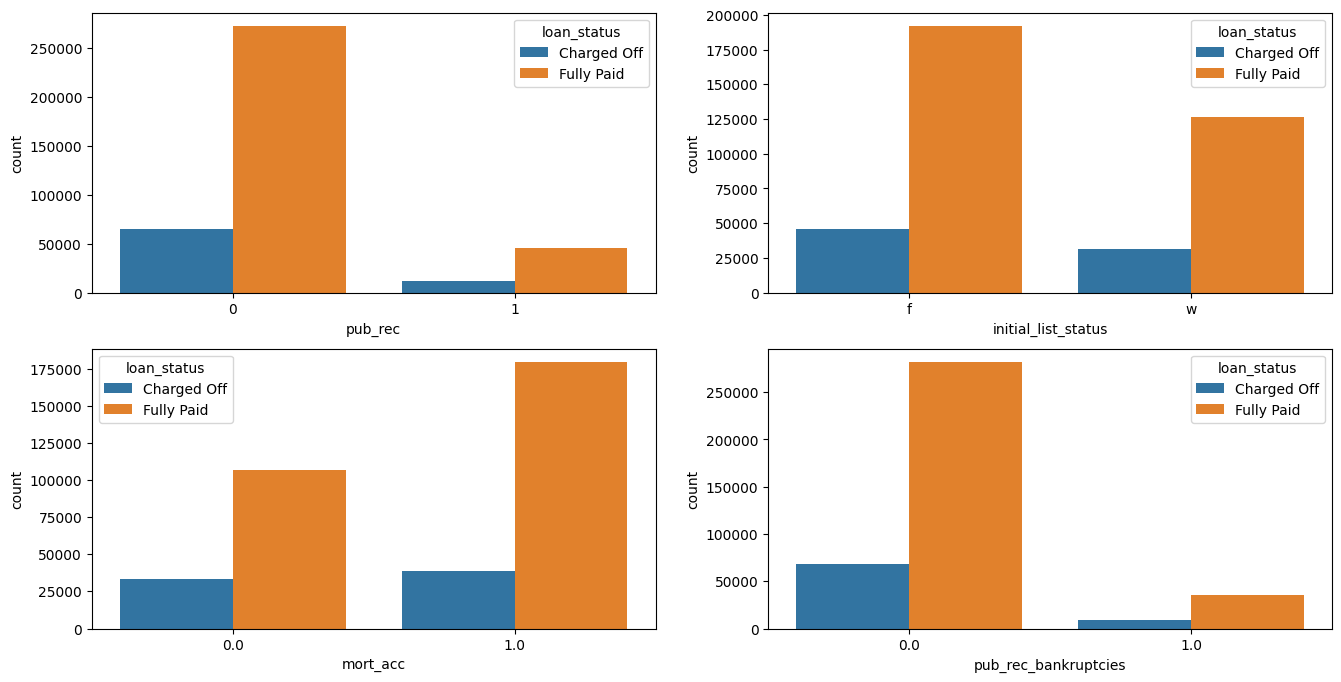

In [219]:
fig = plt.figure(figsize = (16,8))
cols_2 = ['pub_rec','initial_list_status','mort_acc','pub_rec_bankruptcies']
for pos,col in enumerate(cols_2):
    plt.subplot(2,2,pos+1)
    sns.countplot(data=df, x=col, hue='loan_status')
plt.show()

# <font color= purple> <font size = -0.25>  <b> **Duplicate check** </b> </font>

In [220]:
df.duplicated().sum()

0

# <font color= purple> <font size = -0.25>  <b> **Handling missing values** </b> </font>

In [221]:
df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
loan_amnt,0
dti,0
application_type,0
initial_list_status,0


In [222]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

total_acc_avg = numeric_columns.groupby('total_acc')['mort_acc'].mean()

def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [223]:
# check if the mort_acc filled with values i.e there shouldn't be any missing values against it.

df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [224]:
df.shape

(396030, 27)

In [225]:
# droping remaining null values

df.dropna(inplace=True)

df.shape

(370621, 27)

# <font color= purple> <font size = -0.25>  <b> **Outlier Detection** </b> </font>


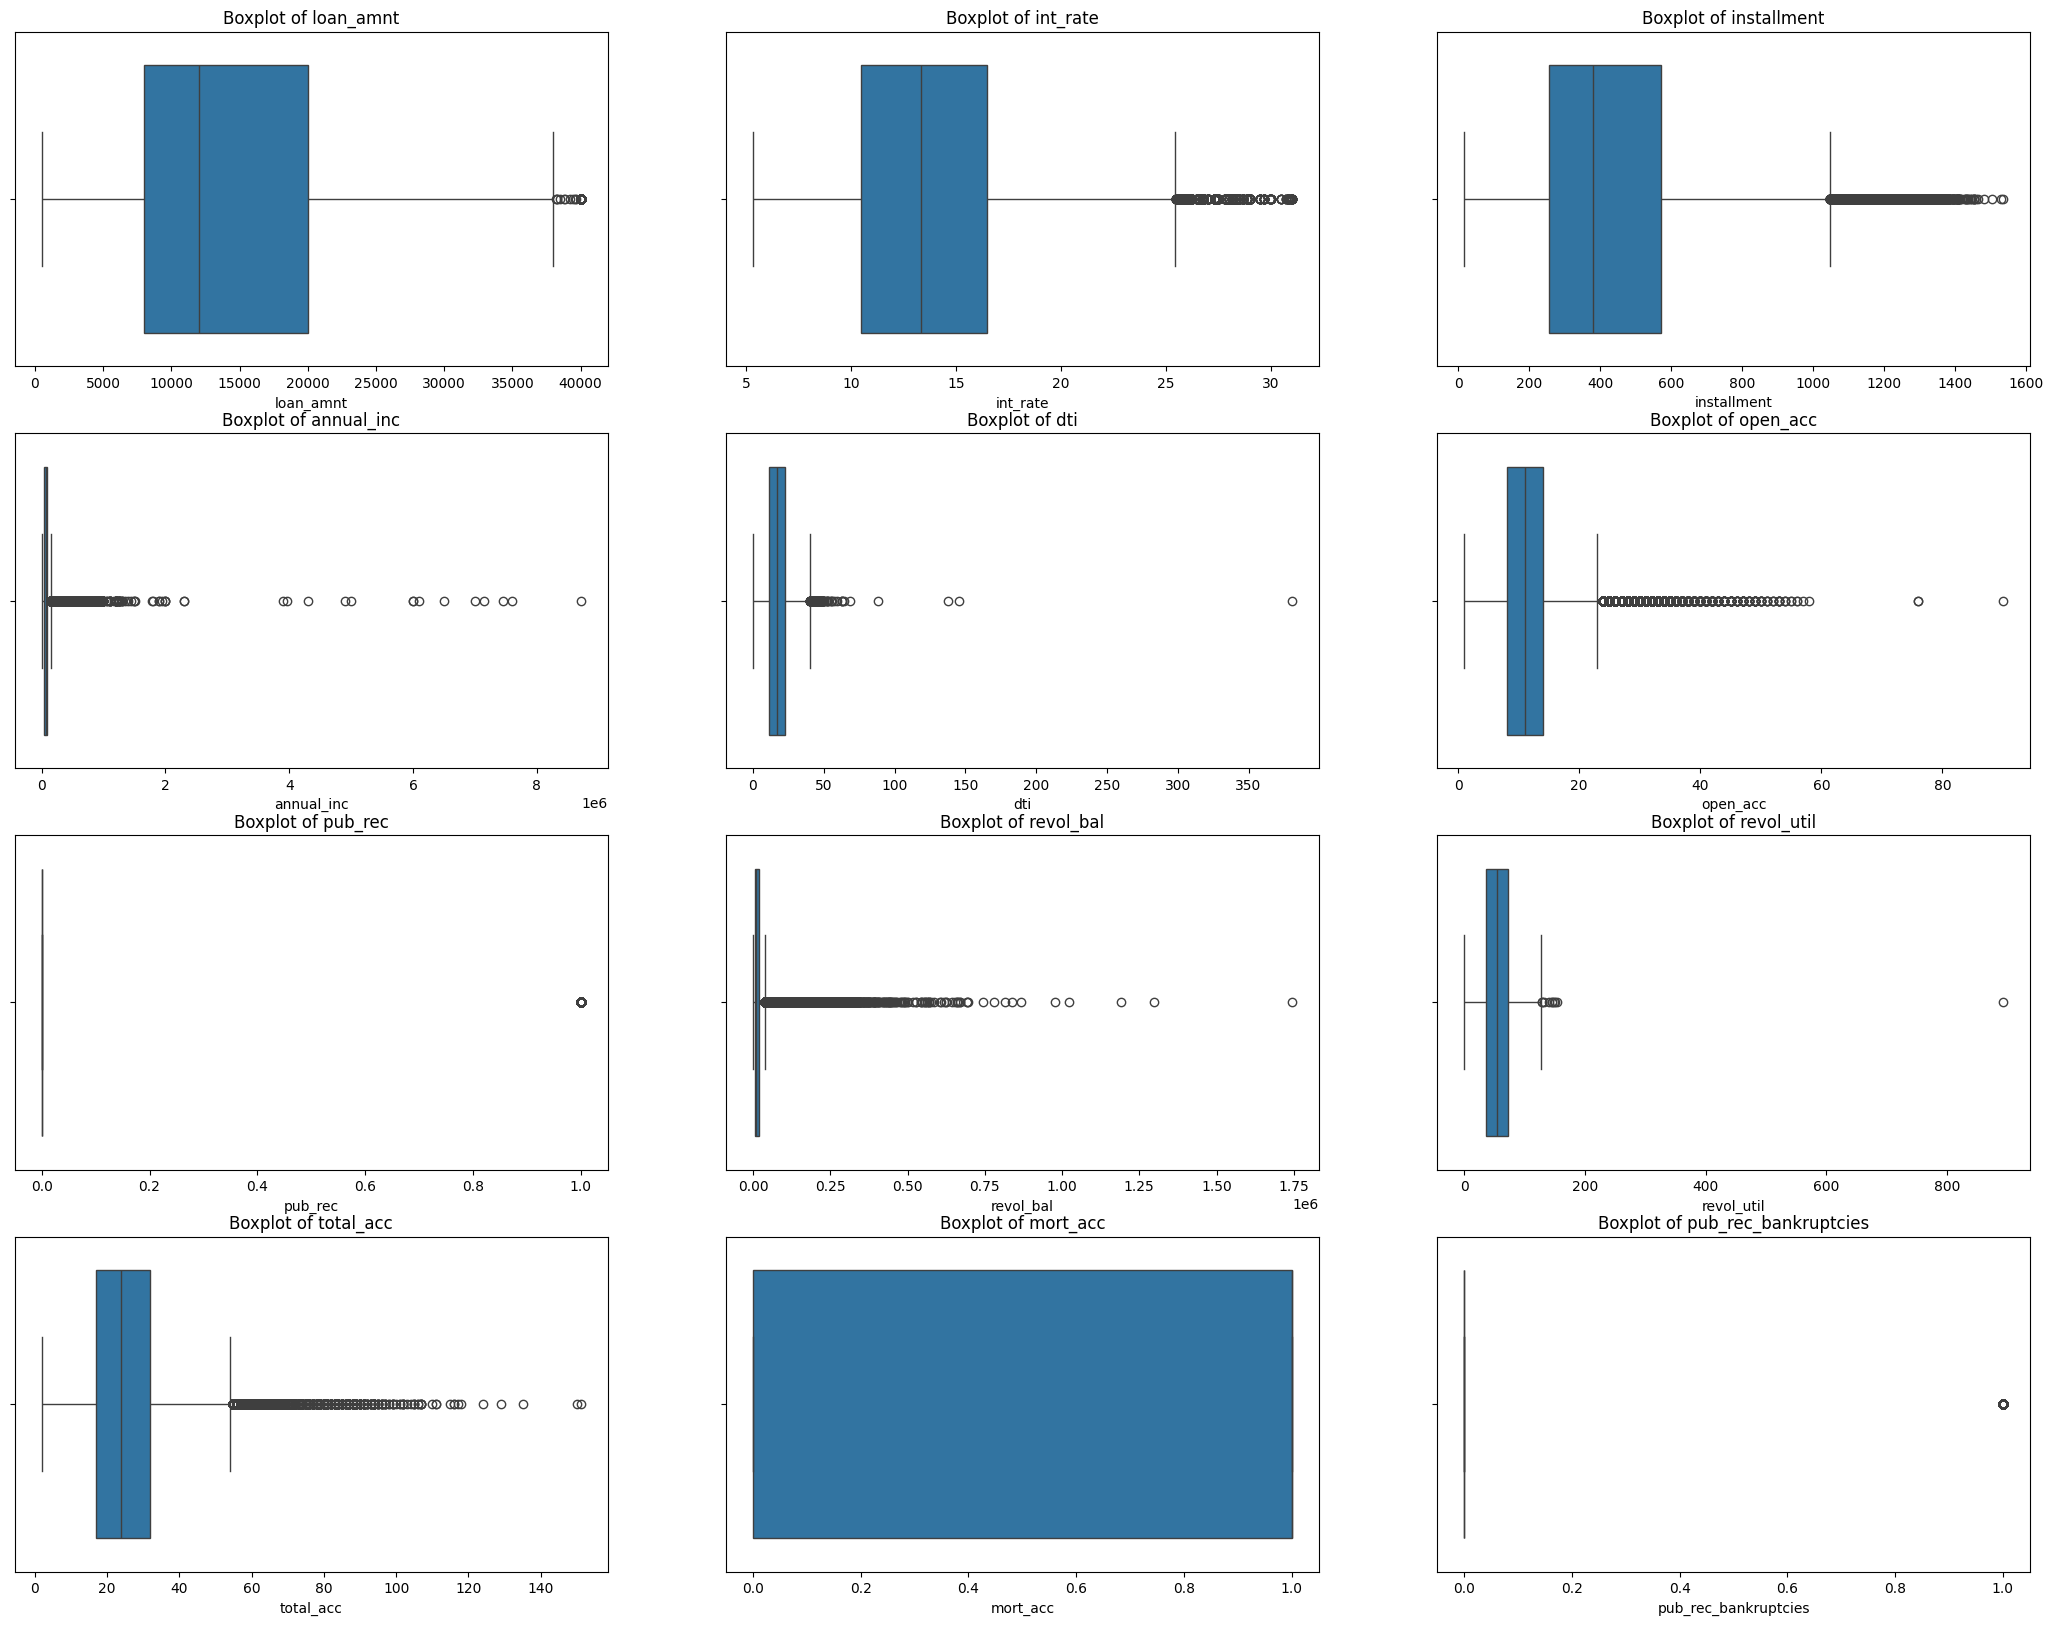

In [226]:
# Boxplot before outlier treatment

fig= plt.figure(figsize=(26, 20))

for pos,col in enumerate(numerical_cols):
    plt.subplot(4,3,pos+1)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(data=df, x=col)
plt.show()

In [227]:
# Outlier treatment

for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    df = df[(df[col] < upper_limit) & (df[col] > lower_limit)] # Excluding/Removing outliers from the dataframe

In [228]:
df.shape

(350357, 27)

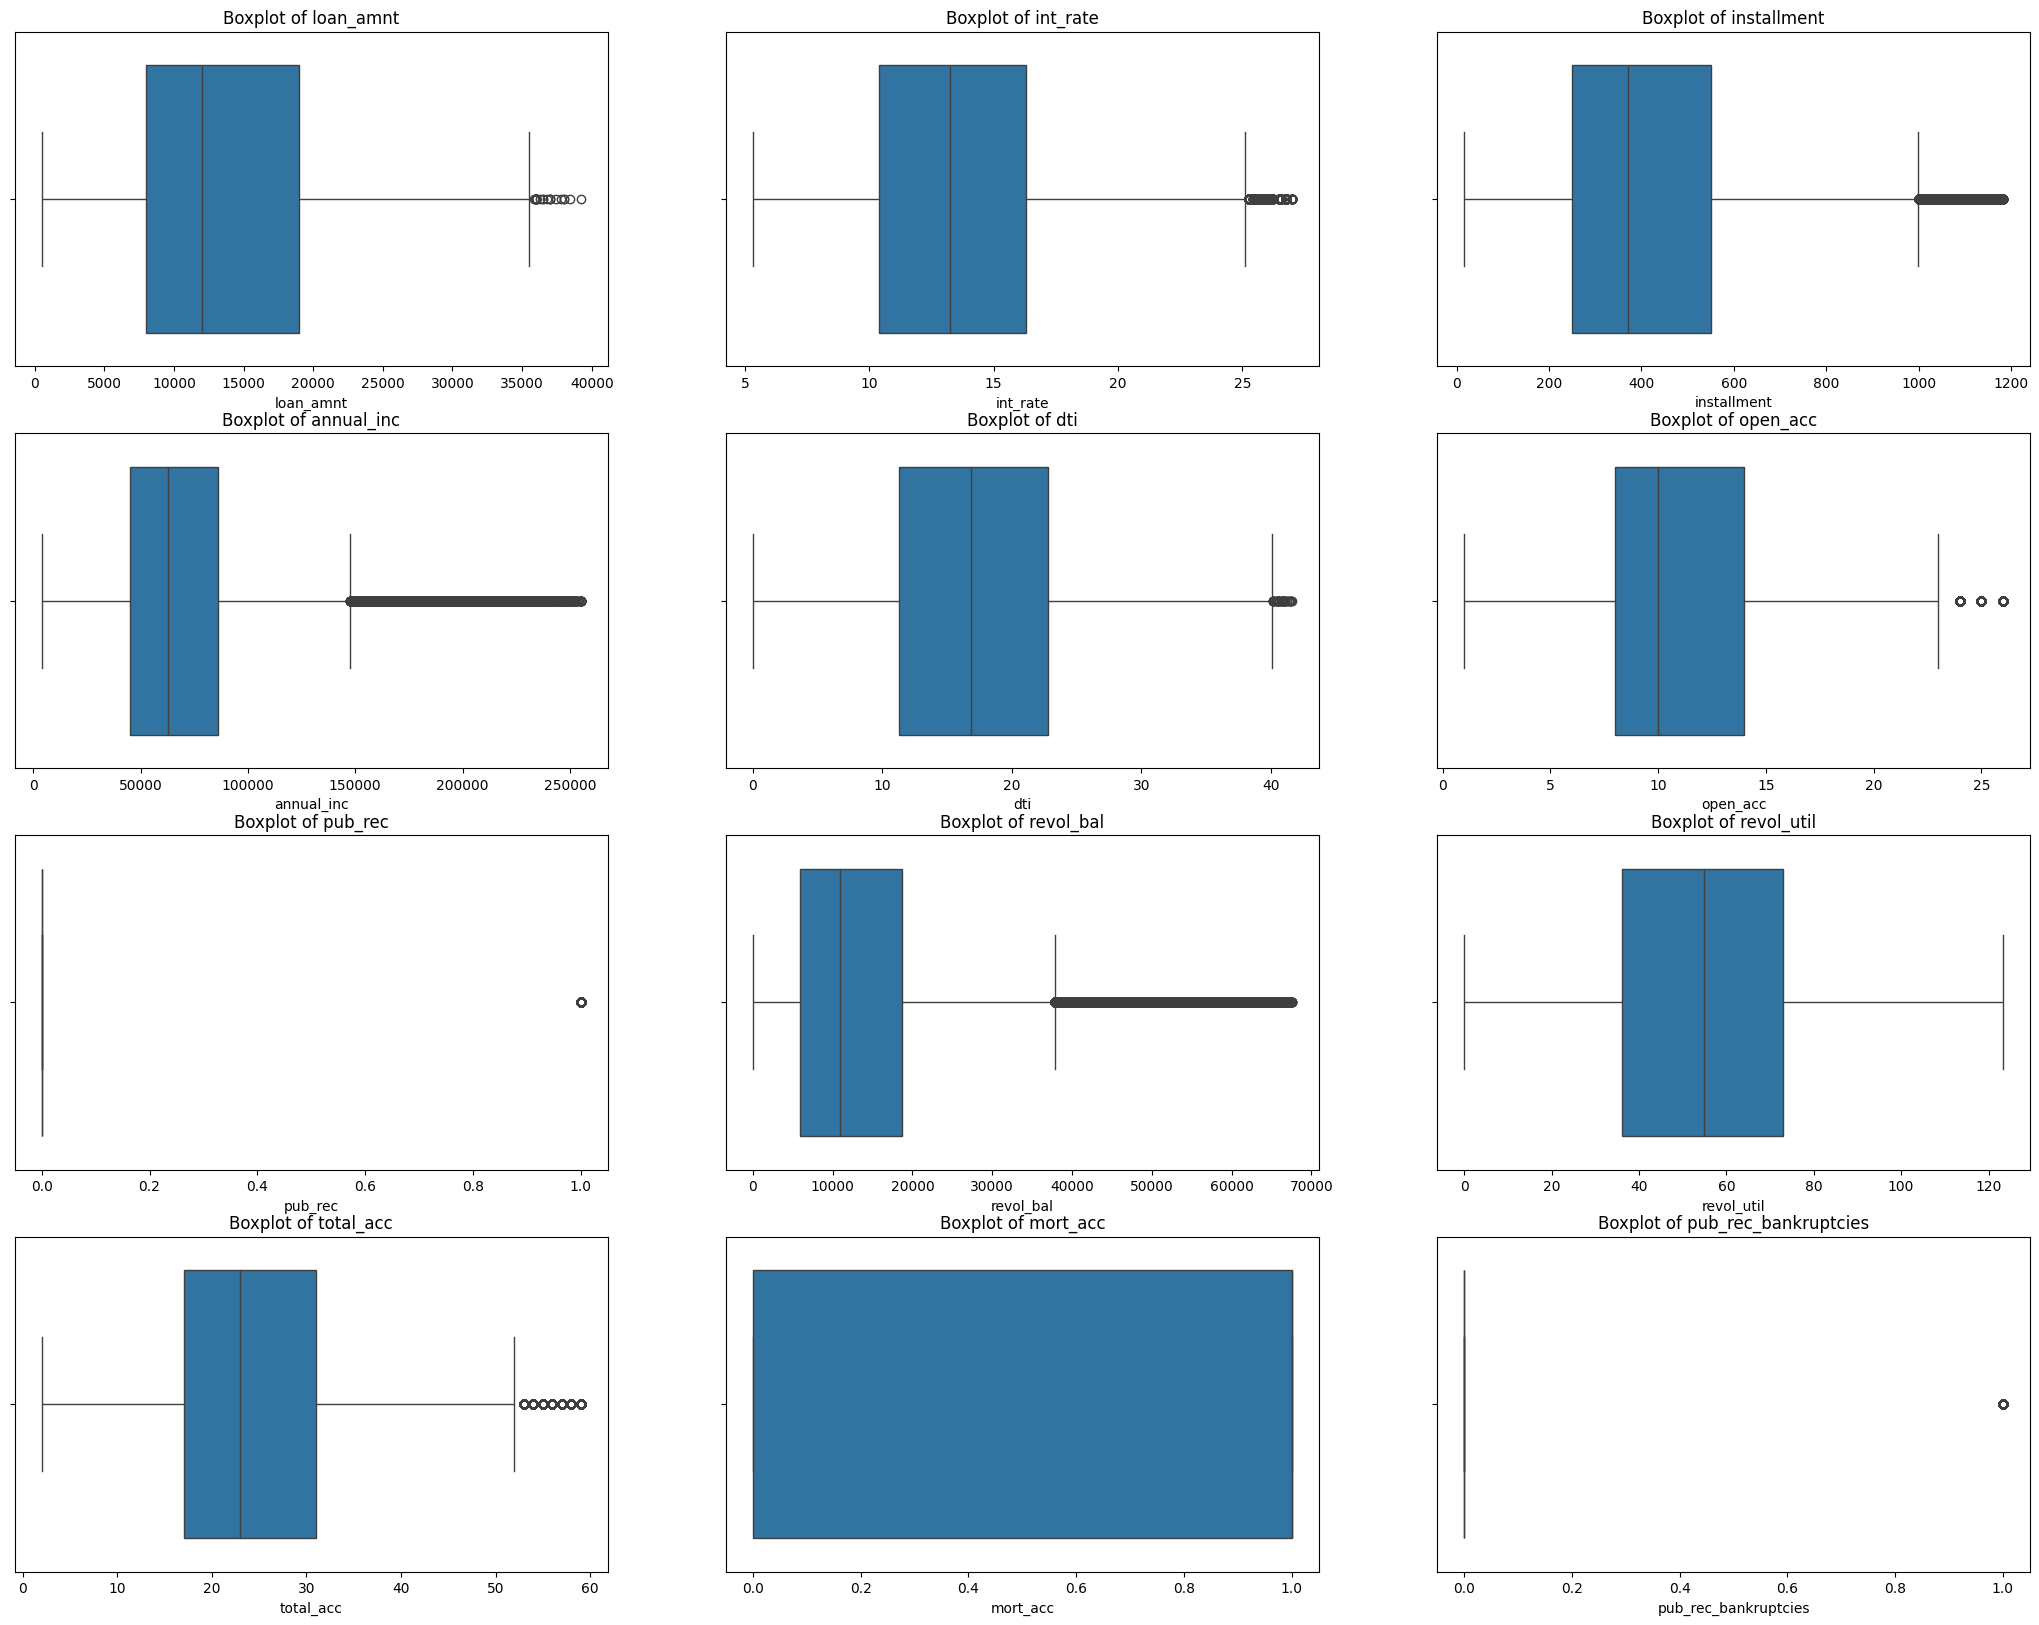

In [229]:
# Boxplot after outlier treatment

fig= plt.figure(figsize=(26, 20))

for pos,col in enumerate(numerical_cols):
    plt.subplot(4,3,pos+1)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(data=df, x=col)
plt.show()

In [230]:
term_values = {' 36 months': 36, ' 60 months': 60}

df['term'] = df['term'].map(term_values)

loan_status_values = {'Fully Paid': 0, 'Charged Off': 1}

df['loan_status'] = df['loan_status'].map(loan_status_values)

list_status = {'w': 0, 'f': 1}

df['initial_list_status'] = df['initial_list_status'].map(list_status)

df['zip_code'] = df['address'].apply(lambda x: x[-5:])

df['zip_code'].value_counts(normalize=True) * 100

,proportion
zip_code,
70466,14.375337
30723,14.289710
22690,14.272299
48052,14.127019
00813,11.605591
29597,11.548792
05113,11.519108
93700,2.768605
11650,2.762896


In [231]:
# Dropping of unnecessary columns

unnecessary_columns=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length']

df.drop(unnecessary_columns,axis=1, inplace=True)

# <font color= purple> <font size = -0.25>  <b> **One-hot encoding** </b> </font>


In [232]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']

data=pd.get_dummies(df,columns=dummies,drop_first=True)

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

# <font color= purple> <font size = -0.25>  <b> **Model Building** </b> </font>


In [233]:
# Importing libraries required for model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=data.drop('loan_status',axis=1)
y=data['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(245249, 51)
(105108, 51)


In [234]:
# Training the model after standardization

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [235]:
y_pred = logreg.predict(X_test)

print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.89


In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     84915
           1       0.94      0.46      0.62     20193

    accuracy                           0.89    105108
   macro avg       0.91      0.73      0.78    105108
weighted avg       0.90      0.89      0.88    105108



[[84341   574]
 [10889  9304]]


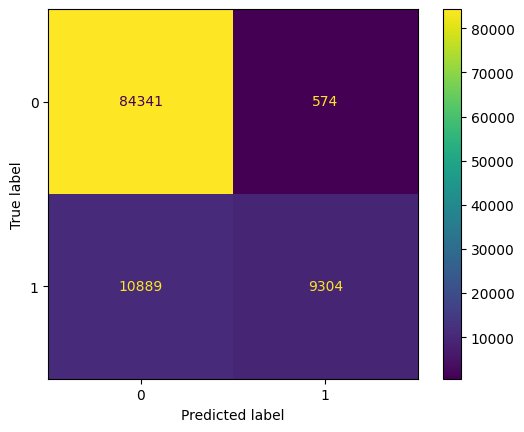

In [237]:
# Plotting confusion Matrix

confusion_matrix=confusion_matrix(y_test,y_pred)

print(confusion_matrix)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_).plot()
plt.show()

**ROC (Receiver Operating characteristic Curve) -**

*   An ROC curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate

    False Positive Rate
*   True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

    TPR=(TP)/(TP+FN)

*   False Positive Rate (FPR) is defined as follows:

    FPR=(FP)/(FP+TN)

*   An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

**AUC (Area under the ROC Curve) -**

*   AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

*   AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

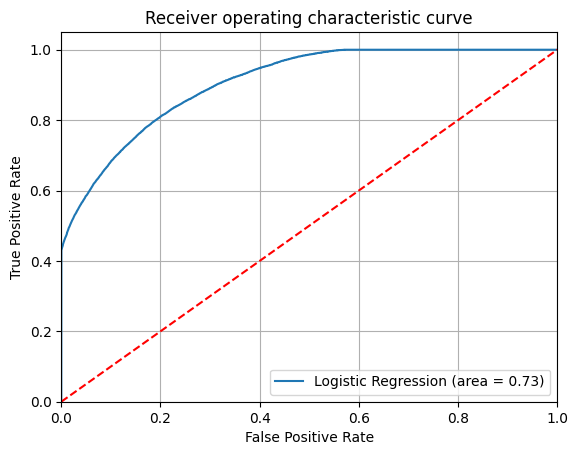

In [238]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

*   ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.
*   There is still some room for model improvement.
*   By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

# <font color= purple> <font size = -0.25>  <b> **Precision-Recall Curve** </b> </font>


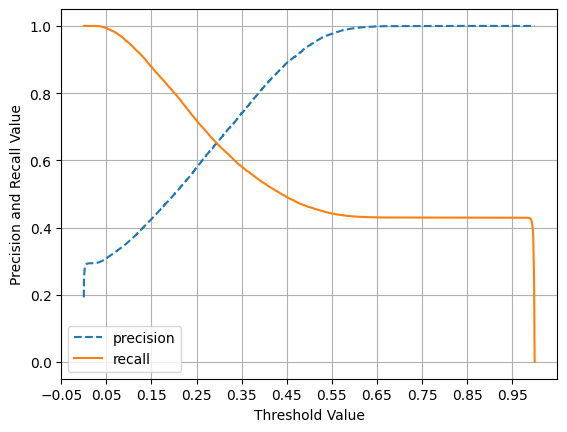

In [239]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

threshold_boundary = thresholds.shape[0]

# Plotting precision
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')

# Plotting recall
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()

# <font color= purple> <font size = -0.25>  <b> Insights:</b> </font>

<font color=black>

*   Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
*   Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.


# <font color= purple> <font size = -0.25>  <b> Recommendations:</b> </font>

<font color=black>

*   80% of the customers have paid the loan fully and remaining 20% of them are defaulters.
*   The organization can use the trained model to make prediction whether a person will likely to pay the loan amount or he will be a defaulter.
*   Model achieves the 94% f1-score for the negative class (Fully Paid).
*   Model achieves the 62% f1-score for the positive class (Charged off).
*   ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still room for improvement.
*   By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
*   The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.
*   Accuracy of Logistic Regression Classifier on test set: 0.89 which is decent and not by chance.